In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv(r"C:\Deloitte_Docs\Data_Science\Jigsaw Academy\Data_Exploratory_Sessions\UsedCarsPrice.csv",na_values=["??","????","???"])
df.head(10)

Unnamed: 0  Price   Age       KM FuelType     HP  MetColor  Automatic  \
0           0  13500  23.0  46986.0   Diesel   90.0       1.0          0   
1           1  13750  23.0  72937.0   Diesel   90.0       1.0          0   
2           2  13950  24.0  41711.0   Diesel   90.0       NaN          0   
3           3  14950  26.0  48000.0   Diesel   90.0       0.0          0   
4           4  13750  30.0  38500.0   Diesel   90.0       0.0          0   
5           5  12950  32.0  61000.0   Diesel   90.0       0.0          0   
6           6  16900  27.0      NaN   Diesel    NaN       NaN          0   
7           7  18600  30.0  75889.0      NaN   90.0       1.0          0   
8           8  21500  27.0  19700.0   Petrol  192.0       0.0          0   
9           9  12950  23.0  71138.0   Diesel    NaN       NaN          0   

     CC  Doors  Weight  
0  2000  three    1165  
1  2000      3    1165  
2  2000      3    1165  
3  2000      3    1165  
4  2000      3    1170  
5  2000      3    1170  
6  2000      3    1245  
7  2000      3    1245  
8  1800      3    1185  
9  1900      3    1105

In [9]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
df.isnull().sum()/df.shape[0]*100

Price         0.000000
Age           6.963788
KM            1.044568
FuelType      6.963788
HP            0.417827
MetColor     10.445682
Automatic     0.000000
CC            0.000000
Doors         0.000000
Weight        0.000000
dtype: float64

In [11]:
df.isnull().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 112.3+ KB


In [13]:
# Missing value column names + count of missing values + Missing value percentage
def missingval(df):
    missvalcount = df.isnull().sum()
    missvalpercent = df.isnull().sum()/df.shape[0]*100
    newdf = pd.concat([missvalcount,missvalpercent],axis=1)
    newdf1 = newdf.rename(columns={0:'missvalcount',1:'missval %'})
    newdf1 =newdf1[newdf1['missvalcount']!=0].sort_values(by='missvalcount',ascending=False)
    return newdf1

In [14]:
missingval(df)

missvalcount  missval %
MetColor           150  10.445682
Age                100   6.963788
FuelType           100   6.963788
KM                  15   1.044568
HP                   6   0.417827

In [15]:
missvalcount = df.isnull().sum()

In [16]:
# Treat missing values
#Numerical cols
#Replace with mean
# Replace with median
# mean = median --- Normal
# mean > median --- Right skewed
# mean <median --- Left skewed

In [17]:
df['Age'].describe()

count    1336.000000
mean       55.672156
std        18.589804
min         1.000000
25%        43.000000
50%        60.000000
75%        70.000000
max        80.000000
Name: Age, dtype: float64

In [18]:
# median imputation
df1 = df.copy()
df1['Age'].fillna(df1['Age'].median(),inplace=True)
missingval(df1)

missvalcount  missval %
MetColor           150  10.445682
FuelType           100   6.963788
KM                  15   1.044568
HP                   6   0.417827

In [19]:
#KM column
df1['KM'].describe()

count      1421.000000
mean      68647.239972
std       37333.023589
min           1.000000
25%       43210.000000
50%       63634.000000
75%       87000.000000
max      243000.000000
Name: KM, dtype: float64

In [20]:
df1['KM'].fillna(df1['KM'].median(),inplace=True)
missingval(df1)

missvalcount  missval %
MetColor           150  10.445682
FuelType           100   6.963788
HP                   6   0.417827

In [21]:
df1['HP'].fillna(df1['HP'].median(),inplace=True)
missingval(df1)

missvalcount  missval %
MetColor           150  10.445682
FuelType           100   6.963788

In [22]:
#knn imputation-- will be covered later
# categorical variables -- mode
df1['MetColor'].value_counts()

1.0    868
0.0    418
Name: MetColor, dtype: int64

In [23]:
df1['MetColor'].mode()

0    1.0
Name: MetColor, dtype: float64

In [24]:
df1['FuelType'].value_counts()

Petrol    1177
Diesel     144
CNG         15
Name: FuelType, dtype: int64

In [25]:
df1['MetColor'] = df1['MetColor'].fillna(df1['MetColor'].mode()[0])
missingval(df1)

missvalcount  missval %
FuelType           100   6.963788

In [26]:
df1['FuelType'] = df1['FuelType'].fillna(df1['FuelType'].mode()[0])
missingval(df1)

Empty DataFrame
Columns: [missvalcount, missval %]
Index: []

In [27]:
df['Doors'].value_counts()

5        673
3        621
4        137
2          2
three      1
four       1
five       1
Name: Doors, dtype: int64

In [28]:
df1['Doors'] = df1['Doors'].replace({'three':3,'four':4,'five':5})

In [29]:
df1['Doors'].value_counts()

5    673
3    621
4    137
2      2
3      1
4      1
5      1
Name: Doors, dtype: int64

In [30]:
df1['Doors'] = df1['Doors'].astype('int')

In [31]:
df1['Doors'].value_counts()

5    674
3    622
4    138
2      2
Name: Doors, dtype: int64

In [32]:
df8 = df1.copy()
df8 = pd.get_dummies(columns=['FuelType'],data=df8,drop_first=True)
df8.head()

Price   Age       KM    HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500  23.0  46986.0  90.0       1.0          0  2000      3    1165   
1  13750  23.0  72937.0  90.0       1.0          0  2000      3    1165   
2  13950  24.0  41711.0  90.0       1.0          0  2000      3    1165   
3  14950  26.0  48000.0  90.0       0.0          0  2000      3    1165   
4  13750  30.0  38500.0  90.0       0.0          0  2000      3    1170   

   FuelType_Diesel  FuelType_Petrol  
0                1                0  
1                1                0  
2                1                0  
3                1                0  
4                1                0

In [33]:
# Frequency encoding
# target encoding
# MinMax,Standardscaler,Robustscaler
#binning

In [34]:
df9 = df1.copy()

In [35]:
df9

Price   Age       KM FuelType     HP  MetColor  Automatic    CC  Doors  \
0     13500  23.0  46986.0   Diesel   90.0       1.0          0  2000      3   
1     13750  23.0  72937.0   Diesel   90.0       1.0          0  2000      3   
2     13950  24.0  41711.0   Diesel   90.0       1.0          0  2000      3   
3     14950  26.0  48000.0   Diesel   90.0       0.0          0  2000      3   
4     13750  30.0  38500.0   Diesel   90.0       0.0          0  2000      3   
...     ...   ...      ...      ...    ...       ...        ...   ...    ...   
1431   7500  60.0  20544.0   Petrol   86.0       1.0          0  1300      3   
1432  10845  72.0  63634.0   Petrol   86.0       0.0          0  1300      3   
1433   8500  60.0  17016.0   Petrol   86.0       0.0          0  1300      3   
1434   7250  70.0  63634.0   Petrol   86.0       1.0          0  1300      3   
1435   6950  76.0      1.0   Petrol  110.0       0.0          0  1600      5   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4       1170  
...      ...  
1431    1025  
1432    1015  
1433    1015  
1434    1015  
1435    1114  

[1436 rows x 10 columns]

In [36]:
df9.head()

Price   Age       KM FuelType    HP  MetColor  Automatic    CC  Doors  \
0  13500  23.0  46986.0   Diesel  90.0       1.0          0  2000      3   
1  13750  23.0  72937.0   Diesel  90.0       1.0          0  2000      3   
2  13950  24.0  41711.0   Diesel  90.0       1.0          0  2000      3   
3  14950  26.0  48000.0   Diesel  90.0       0.0          0  2000      3   
4  13750  30.0  38500.0   Diesel  90.0       0.0          0  2000      3   

   Weight  
0    1165  
1    1165  
2    1165  
3    1165  
4    1170

In [37]:
# Frequency encoding
##trial and error method-

df9['FuelType'].value_counts()

Petrol    1277
Diesel     144
CNG         15
Name: FuelType, dtype: int64

In [38]:
df9['FuelType'].value_counts(normalize = True)

Petrol    0.889276
Diesel    0.100279
CNG       0.010446
Name: FuelType, dtype: float64

In [42]:
table = df9['FuelType'].value_counts(normalize = True)
df9['FuelType'] = df9['FuelType'].map(table)
df9.head(10)

Price   Age       KM  FuelType     HP  MetColor  Automatic    CC  Doors  \
0  13500  23.0  46986.0  0.100279   90.0       1.0          0  2000      3   
1  13750  23.0  72937.0  0.100279   90.0       1.0          0  2000      3   
2  13950  24.0  41711.0  0.100279   90.0       1.0          0  2000      3   
3  14950  26.0  48000.0  0.100279   90.0       0.0          0  2000      3   
4  13750  30.0  38500.0  0.100279   90.0       0.0          0  2000      3   
5  12950  32.0  61000.0  0.100279   90.0       0.0          0  2000      3   
6  16900  27.0  63634.0  0.100279  110.0       1.0          0  2000      3   
7  18600  30.0  75889.0  0.889276   90.0       1.0          0  2000      3   
8  21500  27.0  19700.0  0.889276  192.0       0.0          0  1800      3   
9  12950  23.0  71138.0  0.100279  110.0       1.0          0  1900      3   

   Weight  
0    1165  
1    1165  
2    1165  
3    1165  
4    1170  
5    1170  
6    1245  
7    1245  
8    1185  
9    1105

In [41]:
missingval(df1)

Empty DataFrame
Columns: [missvalcount, missval %]
Index: []

In [43]:
# Target encoding - 
## we take the mean of the target variable
## target leakage will happen

df10 = df1.copy()

In [44]:
df10['FuelType'] = df10.groupby('FuelType')['Price'].transform('mean')
df10.head(5)

Price   Age       KM      FuelType    HP  MetColor  Automatic    CC  Doors  \
0  13500  23.0  46986.0  10889.277778  90.0       1.0          0  2000      3   
1  13750  23.0  72937.0  10889.277778  90.0       1.0          0  2000      3   
2  13950  24.0  41711.0  10889.277778  90.0       1.0          0  2000      3   
3  14950  26.0  48000.0  10889.277778  90.0       0.0          0  2000      3   
4  13750  30.0  38500.0  10889.277778  90.0       0.0          0  2000      3   

   Weight  
0    1165  
1    1165  
2    1165  
3    1165  
4    1170

In [47]:
df10['FuelType'].value_counts()
# replaced all the petrol values with the avg of its price values for example

10726.427565    1277
10889.277778     144
9584.000000       15
Name: FuelType, dtype: int64

In [48]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [49]:
# MinMax == (x-xmin)/(xmax-xmin)
# Standard Scaler == (x-mean)/std
# Robust Scaler == (x-median)/IQR
## if we have outliers in the dataset then minmaxscaler is not used.
## Standard Scaler is the most common scaling that is used

In [50]:
df11 = df8.copy()
minmax = MinMaxScaler()
for i in df11.columns:
    df11[i] = minmax.fit_transform(df11[i].values.reshape(-1,1))
df11.head()

Price       Age        KM        HP  MetColor  Automatic   CC     Doors  \
0  0.325044  0.278481  0.193355  0.170732       1.0        0.0  1.0  0.333333   
1  0.333925  0.278481  0.300149  0.170732       1.0        0.0  1.0  0.333333   
2  0.341030  0.291139  0.171647  0.170732       1.0        0.0  1.0  0.333333   
3  0.376554  0.316456  0.197528  0.170732       0.0        0.0  1.0  0.333333   
4  0.333925  0.367089  0.158433  0.170732       0.0        0.0  1.0  0.333333   

     Weight  FuelType_Diesel  FuelType_Petrol  
0  0.268293              1.0              0.0  
1  0.268293              1.0              0.0  
2  0.268293              1.0              0.0  
3  0.268293              1.0              0.0  
4  0.276423              1.0              0.0

In [51]:
df12 = df8.copy()
sc = StandardScaler()
for i in df11.columns:
    df12[i] = sc.fit_transform(df12[i].values.reshape(-1,1))
df12.head()

Price       Age        KM        HP  MetColor  Automatic        CC  \
0  0.763763 -1.836152 -0.582011 -0.781004  0.640788  -0.242893  2.314976   
1  0.832715 -1.836152  0.116950 -0.781004  0.640788  -0.242893  2.314976   
2  0.887877 -1.780466 -0.724087 -0.781004  0.640788  -0.242893  2.314976   
3  1.163685 -1.669095 -0.554700 -0.781004 -1.560579  -0.242893  2.314976   
4  0.832715 -1.446353 -0.810572 -0.781004 -1.560579  -0.242893  2.314976   

      Doors    Weight  FuelType_Diesel  FuelType_Petrol  
0 -1.085139  1.758561         2.995367        -2.833981  
1 -1.085139  1.758561         2.995367        -2.833981  
2 -1.085139  1.758561         2.995367        -2.833981  
3 -1.085139  1.758561         2.995367        -2.833981  
4 -1.085139  1.853577         2.995367        -2.833981

In [52]:
df13 = df8.copy()
rb = RobustScaler()
for i in df13.columns:
    df13[i] = rb.fit_transform(df13[i].values.reshape(-1,1))
df13.head()

Price       Age        KM   HP  MetColor  Automatic   CC  Doors  \
0  1.028571 -1.541667 -0.383504 -1.0       0.0        0.0  2.0   -0.5   
1  1.100000 -1.541667  0.214304 -1.0       0.0        0.0  2.0   -0.5   
2  1.157143 -1.500000 -0.505019 -1.0       0.0        0.0  2.0   -0.5   
3  1.442857 -1.416667 -0.360145 -1.0      -1.0        0.0  2.0   -0.5   
4  1.100000 -1.250000 -0.578988 -1.0      -1.0        0.0  2.0   -0.5   

     Weight  FuelType_Diesel  FuelType_Petrol  
0  2.111111              1.0             -1.0  
1  2.111111              1.0             -1.0  
2  2.111111              1.0             -1.0  
3  2.111111              1.0             -1.0  
4  2.222222              1.0             -1.0

In [53]:
df = pd.DataFrame({'Name' : ['a' , 'b' , 'c' , 'd' , 'e' , 'f'] , 'Age' : [1 , 12 , 14 , 30 , 40 , 70]})
df

Name  Age
0    a    1
1    b   12
2    c   14
3    d   30
4    e   40
5    f   70

In [55]:
df['new'] = pd.cut(df['Age'] , bins = [0,10,20,50,80] , labels = ['kid' , 'teen' , '20-50' , '50-80'])
# bins is the range(0-10 , 10-20 , 20-50 , 50-80)
df

Name  Age    new
0    a    1    kid
1    b   12   teen
2    c   14   teen
3    d   30  20-50
4    e   40  20-50
5    f   70  50-80

In [56]:
df['new1'] = pd.qcut(df['Age'] , q = 4 , labels = ['kid' , 'teen' , 'young' , 'old'])
# based on the number of quartiles it has to decide
df

Name  Age    new   new1
0    a    1    kid    kid
1    b   12   teen    kid
2    c   14   teen   teen
3    d   30  20-50  young
4    e   40  20-50    old
5    f   70  50-80    old

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [63]:
df = np.matrix(([1,2,4] , [4,1,2] , [5,4,8]))
df = pd.DataFrame(df)

In [64]:
df

0  1  2
0  1  2  4
1  4  1  2
2  5  4  8

In [65]:
# next step - Standardizing the data - 
sc = StandardScaler()
df1 = sc.fit_transform(df)
df1 = pd.DataFrame(df1)
df1

0         1         2
0 -1.372813 -0.267261 -0.267261
1  0.392232 -1.069045 -1.069045
2  0.980581  1.336306  1.336306

In [66]:
# Covariance Matrix Computation - 

dfcov = df1.cov()
dfcov
## above the diagonal and below the diagonal the values will be same as shown below

0         1         2
0  1.500000  0.628971  0.628971
1  0.628971  1.500000  1.500000
2  0.628971  1.500000  1.500000

In [69]:
# now get the Eigen values and Eigen vectors - 

eigenvalues,eigenvectors = np.linalg.eig(dfcov)
print(f'Eigen values :{eigenvalues}')
print(f'Eigen vectors : {eigenvectors}')

## [[-4.21537439e-01 -9.06810999e-01 -4.92222871e-18]
## [-6.41212207e-01  2.98071982e-01 -7.07106781e-01]
## [-6.41212207e-01  2.98071982e-01  7.07106781e-01]] -> these are the eigen vectors

## [ 3.41348992e+00  1.08651008e+00 -1.40107377e-32] -> these are the eigen values

Eigen values :[ 3.41348992e+00  1.08651008e+00 -1.40107377e-32]
Eigen vectors : [[-4.21537439e-01 -9.06810999e-01 -4.92222871e-18]
 [-6.41212207e-01  2.98071982e-01 -7.07106781e-01]
 [-6.41212207e-01  2.98071982e-01  7.07106781e-01]]


In [71]:
# compute the eigenvalues and eigenvectors of the Covariance matrix to identify the Principal components - 
## multiplication of the Principal components with the Standard values
## this is matrix multiplication - 
## both should be in the array form

pca_manual = np.matmul(np.array(df1) , eigenvectors)
pca_manual

## this will be the final dataset
## we need to convert into the array form as earlier it is in the DataFrame format

array([[ 9.21434395e-01,  1.08555570e+00, -2.77555756e-17],
       [ 1.20562878e+00, -9.92985241e-01, -1.11022302e-16],
       [-2.12706317e+00, -9.25704621e-02,  1.11022302e-16]])

In [72]:
from sklearn.decomposition import PCA

In [73]:
df = pd.read_csv(r'C:\Deloitte_Docs\Data_Science\Jigsaw Academy\Data_Exploratory_Sessions\weatherAnalysis.csv')

In [74]:
df.head()

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0  07-02-2014  CoffsHarbour     17.7     25.9       2.2          1.6   
1  23-04-2009      Portland      6.7     22.0       0.0          5.4   
2  08-11-2015      Watsonia      6.2     25.7       0.0          4.2   
3  21-11-2012    Wollongong     13.8     22.8       0.0          NaN   
4  30-07-2013    Townsville     13.4     27.2       0.0          6.0   

   Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0       NaN         NNE           31.0         SW  ...        76.0   
1       0.4         NNE           44.0         NE  ...        65.0   
2      10.9         WSW           20.0         SE  ...        71.0   
3       NaN         SSW           70.0          N  ...        65.0   
4      10.2         ENE           30.0        SSW  ...        61.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         66.0       1017.3       1016.5       7.0       4.0     21.5   
1         37.0       1014.0       1008.8       7.0       8.0     14.0   
2         28.0       1022.5       1019.4       2.0       7.0     12.8   
3         76.0       1017.0       1010.6       NaN       NaN     18.9   
4         46.0       1016.8       1011.8       1.0       1.0     21.7   

   Temp3pm  RainToday  RainTomorrow  
0     24.2        Yes            No  
1     21.8         No           Yes  
2     23.6         No            No  
3     20.6         No            No  
4     25.6         No            No  

[5 rows x 23 columns]

In [75]:
df.dropna(inplace = True)

In [76]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [85]:
df1 = df.drop(columns = ['Date' , 'Location' , 'WindGustDir' , 'WindDir3pm' , 'WindDir9am', 'RainToday' , 'RainTomorrow'] , axis=1)

In [86]:
df1

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
1          6.7     22.0       0.0          5.4       0.4           44.0   
2          6.2     25.7       0.0          4.2      10.9           20.0   
4         13.4     27.2       0.0          6.0      10.2           30.0   
6         12.5     24.7       0.0          6.4       6.6           31.0   
7         19.9     35.0       0.0         10.2      12.5           37.0   
...        ...      ...       ...          ...       ...            ...   
99993      8.3     19.7       0.0          2.4       0.7           41.0   
99995     17.6     34.4       0.0         15.6      12.9           44.0   
99996     10.2     15.9       0.0          3.8       3.8           89.0   
99997     17.1     26.4       0.0          7.0       5.2           85.0   
99999     17.5     21.4       0.0          8.0       1.2           39.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
1              13.0          19.0         65.0         37.0       1014.0   
2               7.0           6.0         71.0         28.0       1022.5   
4               7.0          15.0         61.0         46.0       1016.8   
6              11.0          19.0         74.0         64.0       1014.1   
7              24.0           9.0         56.0         23.0       1017.4   
...             ...           ...          ...          ...          ...   
99993          24.0          22.0         78.0         57.0       1021.1   
99995          30.0          22.0         19.0         11.0       1011.1   
99996          57.0          44.0         55.0         46.0       1007.4   
99997           9.0          13.0         50.0         58.0       1014.3   
99999          13.0          13.0         53.0         78.0       1009.9   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
1           1008.8       7.0       8.0     14.0     21.8  
2           1019.4       2.0       7.0     12.8     23.6  
4           1011.8       1.0       1.0     21.7     25.6  
6           1010.9       7.0       3.0     17.5     23.1  
7           1013.3       0.0       1.0     24.2     34.4  
...            ...       ...       ...      ...      ...  
99993       1018.5       7.0       7.0     12.8     19.1  
99995       1006.4       1.0       1.0     25.6     33.5  
99996       1000.7       7.0       7.0     12.7     15.5  
99997       1014.4       3.0       7.0     25.0     21.6  
99999       1005.7       7.0       7.0     19.4     18.3  

[39869 rows x 16 columns]

In [87]:
df2 = df1.copy()
df2.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
1      6.7     22.0       0.0          5.4       0.4           44.0   
2      6.2     25.7       0.0          4.2      10.9           20.0   
4     13.4     27.2       0.0          6.0      10.2           30.0   
6     12.5     24.7       0.0          6.4       6.6           31.0   
7     19.9     35.0       0.0         10.2      12.5           37.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
1          13.0          19.0         65.0         37.0       1014.0   
2           7.0           6.0         71.0         28.0       1022.5   
4           7.0          15.0         61.0         46.0       1016.8   
6          11.0          19.0         74.0         64.0       1014.1   
7          24.0           9.0         56.0         23.0       1017.4   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
1       1008.8       7.0       8.0     14.0     21.8  
2       1019.4       2.0       7.0     12.8     23.6  
4       1011.8       1.0       1.0     21.7     25.6  
6       1010.9       7.0       3.0     17.5     23.1  
7       1013.3       0.0       1.0     24.2     34.4

In [88]:
df.dtypes
## getting to know which are the numerical and cateogrical columns, seggregating

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [89]:
df2.head(1)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
1      6.7     22.0       0.0          5.4       0.4           44.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
1          13.0          19.0         65.0         37.0       1014.0   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
1       1008.8       7.0       8.0     14.0     21.8

In [90]:
sc = StandardScaler()
df2 = pd.DataFrame(sc.fit_transform(df2) , columns = df2.columns)
df2

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     -1.053867 -0.318894 -0.306381    -0.026968 -1.948832       0.233925   
1     -1.131716  0.212511 -0.306381    -0.353985  0.840855      -1.566672   
2     -0.010691  0.427945 -0.306381     0.136541  0.654876      -0.816424   
3     -0.150819  0.068888 -0.306381     0.245547 -0.301588      -0.741399   
4      1.001346  1.548203 -0.306381     1.281103  1.265951      -0.291249   
...         ...       ...       ...          ...       ...            ...   
39864 -0.804750 -0.649226 -0.306381    -0.844512 -1.869126       0.008850   
39865  0.643241  1.462030 -0.306381     2.752682  1.372224       0.233925   
39866 -0.508924 -1.194993 -0.306381    -0.462991 -1.045504       3.610044   
39867  0.565392  0.313047 -0.306381     0.409056 -0.673546       3.309944   
39868  0.627671 -0.405067 -0.306381     0.681570 -1.736284      -0.141200   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0         -0.322909     -0.092363    -0.045601    -0.623155    -0.467662   
1         -1.043029     -1.619074     0.278661    -1.068453     0.761135   
2         -1.043029     -0.562120    -0.261776    -0.177858    -0.062882   
3         -0.562949     -0.092363     0.440792     0.712737    -0.453206   
4          0.997310     -1.266756    -0.531995    -1.315840     0.023857   
...             ...           ...          ...          ...          ...   
39864      0.997310      0.259955     0.656967     0.366395     0.558745   
39865      1.717430      0.259955    -2.531612    -1.909570    -0.886899   
39866      4.957968      2.843619    -0.586038    -0.177858    -1.421787   
39867     -0.802989     -0.796999    -0.856257     0.415872    -0.424293   
39868     -0.322909     -0.796999    -0.694126     1.405422    -1.060376   

       Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
0        -0.871675  0.988544  1.385613 -0.640796 -0.133052  
1         0.670712 -0.798601  1.008397 -0.823567  0.130555  
2        -0.435151 -1.156030 -1.254904  0.531986  0.423450  
3        -0.566108  0.988544 -0.500470 -0.107713  0.057331  
4        -0.216888 -1.513459 -1.254904  0.912759  1.712191  
...            ...       ...       ...       ...       ...  
39864     0.539755  0.988544  1.008397 -0.823567 -0.528461  
39865    -1.220895 -1.156030 -1.254904  1.125992  1.580388  
39866    -2.050292  0.988544  1.008397 -0.838798 -1.055673  
39867    -0.056829 -0.441172  1.008397  1.034607 -0.162341  
39868    -1.322751  0.988544  1.008397  0.181674 -0.645619  

[39869 rows x 16 columns]

In [91]:
df2.head()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0 -1.053867 -0.318894 -0.306381    -0.026968 -1.948832       0.233925   
1 -1.131716  0.212511 -0.306381    -0.353985  0.840855      -1.566672   
2 -0.010691  0.427945 -0.306381     0.136541  0.654876      -0.816424   
3 -0.150819  0.068888 -0.306381     0.245547 -0.301588      -0.741399   
4  1.001346  1.548203 -0.306381     1.281103  1.265951      -0.291249   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0     -0.322909     -0.092363    -0.045601    -0.623155    -0.467662   
1     -1.043029     -1.619074     0.278661    -1.068453     0.761135   
2     -1.043029     -0.562120    -0.261776    -0.177858    -0.062882   
3     -0.562949     -0.092363     0.440792     0.712737    -0.453206   
4      0.997310     -1.266756    -0.531995    -1.315840     0.023857   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
0    -0.871675  0.988544  1.385613 -0.640796 -0.133052  
1     0.670712 -0.798601  1.008397 -0.823567  0.130555  
2    -0.435151 -1.156030 -1.254904  0.531986  0.423450  
3    -0.566108  0.988544 -0.500470 -0.107713  0.057331  
4    -0.216888 -1.513459 -1.254904  0.912759  1.712191

In [92]:
pca1 = PCA()

In [93]:
# apply this on your df2 - 
# project the original data into the PCA space - 

pcafit = pca1.fit_transform(df2)

In [94]:
pca1.components_

array([[ 0.29323834,  0.39129384, -0.05233676,  0.32503569,  0.25205023,
         0.09321086,  0.07541099,  0.07623651, -0.28897076, -0.23741992,
        -0.19789226, -0.23181274, -0.16713836, -0.16407996,  0.36131093,
         0.38810153],
       [ 0.24309687,  0.00636595,  0.22474464,  0.01567361, -0.31989278,
         0.28107484,  0.18637494,  0.23392143,  0.1585967 ,  0.30271199,
        -0.36600696, -0.32686437,  0.34938011,  0.3481102 ,  0.13434013,
        -0.02085549],
       [-0.26511503, -0.19964999, -0.08578846,  0.02858615,  0.12679703,
         0.48420906,  0.46756859,  0.44623348, -0.21386736, -0.19267897,
        -0.02792757,  0.00159842, -0.14946558, -0.11783562, -0.23020022,
        -0.20132608],
       [-0.20724262, -0.0949316 ,  0.29838877, -0.22376871,  0.21146216,
        -0.02091264, -0.28401121, -0.08428363,  0.16314005, -0.01808843,
        -0.47293493, -0.48099204, -0.28202953, -0.2833539 , -0.16222018,
        -0.08889533],
       [ 0.17865353,  0.04687976,  0

In [95]:
pca1.components_[0]

array([ 0.29323834,  0.39129384, -0.05233676,  0.32503569,  0.25205023,
        0.09321086,  0.07541099,  0.07623651, -0.28897076, -0.23741992,
       -0.19789226, -0.23181274, -0.16713836, -0.16407996,  0.36131093,
        0.38810153])

In [96]:
## imp - how many principal components to consider:

pca1.explained_variance_ratio_

array([0.34545814, 0.2145684 , 0.13416047, 0.06332069, 0.05625497,
       0.04691753, 0.0298581 , 0.02568758, 0.02473507, 0.01955873,
       0.01622369, 0.0134821 , 0.00575537, 0.00186347, 0.00151707,
       0.00063861])

In [97]:
np.cumsum(pca1.explained_variance_ratio_)

## upto 10 components we can conclude the variance in data, we do not need 16 principal components

array([0.34545814, 0.56002654, 0.69418701, 0.7575077 , 0.81376267,
       0.8606802 , 0.8905383 , 0.91622588, 0.94096095, 0.96051969,
       0.97674338, 0.99022548, 0.99598085, 0.99784432, 0.99936139,
       1.        ])

<BarContainer object of 16 artists>

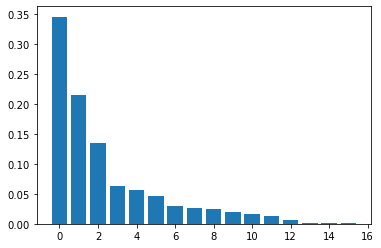

In [98]:
plt.bar(range(len(pca1.explained_variance_ratio_)) , pca1.explained_variance_ratio_)

<BarContainer object of 16 artists>

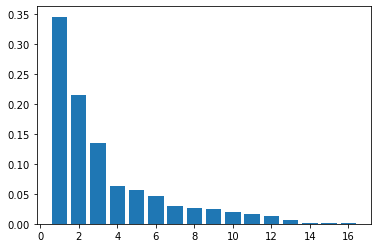

In [99]:
plt.bar(range(1 , len(pca1.explained_variance_ratio_)+1) , pca1.explained_variance_ratio_)

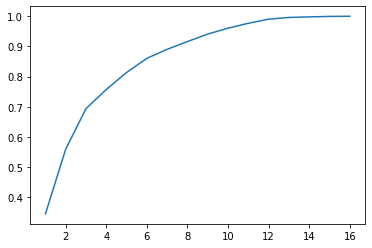

In [100]:
plt.plot(range(1 , len(pca1.explained_variance_ratio_)+1), np.cumsum(pca1.explained_variance_ratio_))

In [106]:
## deciding how many to keep now - 

pca2 = PCA(n_components = 8)

In [102]:
pca2

PCA(n_components=8)

In [103]:
pcafit2 = pca2.fit_transform(df2)

In [107]:
pcafit2 = PCA(n_components=8)

In [104]:
pcafit2

array([[-1.14733737,  1.28451005,  0.04730012, ...,  1.27759597,
        -0.74700626, -0.33388533],
       [-0.89574416, -2.4490305 , -1.29845205, ...,  0.96226634,
        -0.07855891, -0.7496099 ],
       [ 1.17905103, -1.53965389, -0.89896569, ..., -0.48375   ,
         0.16115377,  0.13336496],
       ...,
       [-0.16287161,  4.38043802,  5.92419116, ...,  0.16618145,
         1.24934913, -0.41275395],
       [ 0.91964534,  1.38993505,  0.46817108, ...,  0.3897899 ,
        -0.18275578, -0.7358227 ],
       [-0.40500517,  2.23105029, -1.10818635, ...,  0.61908072,
         0.76656168,  0.72170248]])

In [105]:
# final data frame creation - 

final = pd.DataFrame(pcafit2 , columns = ['pc1' , 'pc2' , 'pc3' , 'pc4' , 'pc5' , 'pc6' , 'pc7' , 'pc8'])
final.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0 -1.147337  1.284510  0.047300 -0.065573 -1.881343  1.277596 -0.747006   
1 -0.895744 -2.449030 -1.298452  0.289124 -0.763734  0.962266 -0.078559   
2  1.179051 -1.539654 -0.898966  1.096009 -0.048562 -0.483750  0.161154   
3 -0.291491  0.452400 -0.937506  0.418786 -0.511299 -0.429427 -0.252226   
4  3.567295 -1.692015 -0.405575 -0.123076  0.464116  0.371430  1.281231   

        pc8  
0 -0.333885  
1 -0.749610  
2  0.133365  
3  1.007528  
4  0.245812

<AxesSubplot:>

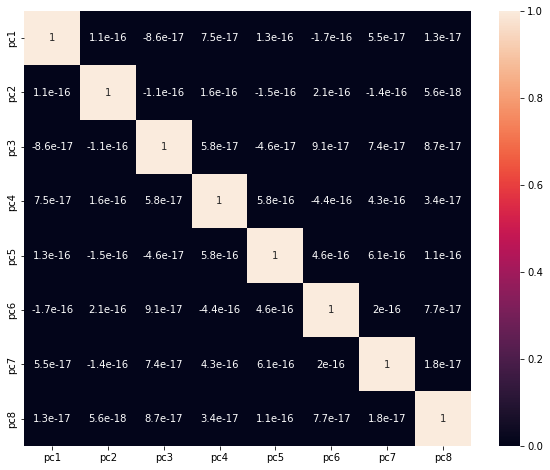

In [108]:
plt.figure(figsize = (10,8))
sns.heatmap(final.corr() , annot = True)